In [1]:
#read the dataset
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

abalone_df = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\abalone.csv") 
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
X_new = abalone_df.drop(['Sex'], axis=1) 
y_new = abalone_df['Sex']
print(y_new.value_counts()) 

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [4]:
Y = label_binarize(y_new, classes=['M','I','F'])
n_classes = Y.shape[1]

In [5]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_new, Y, test_size = 0.20, 
                                                                random_state = 5)
print(X_train_ab.shape)
print(X_test_ab.shape)
print(y_train_ab.shape)
print(y_test_ab.shape)

(3341, 8)
(836, 8)
(3341, 3)
(836, 3)


In [10]:
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train_ab, y_train_ab).decision_function(X_test_ab)
y_score

array([[-0.79297491, -0.40002524, -1.16854266],
       [-0.88500429, -0.40654148, -1.04161525],
       [ 0.24147121, -4.37180646,  0.06384401],
       ...,
       [ 0.47867395, -6.05874702,  0.72995862],
       [-1.14677056,  0.80551282, -1.89784715],
       [-0.31819493, -2.17042888, -0.54194653]])

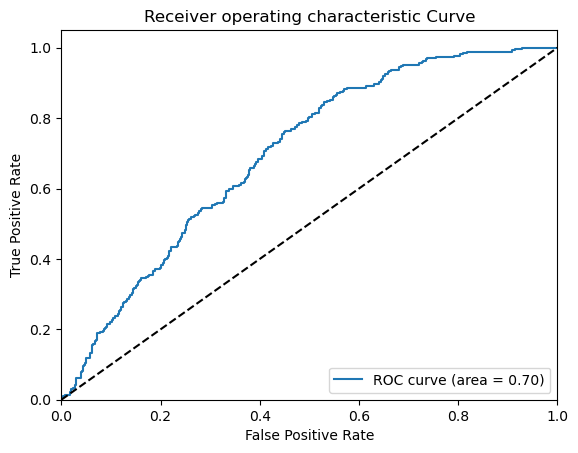

In [8]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ab[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_ab.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

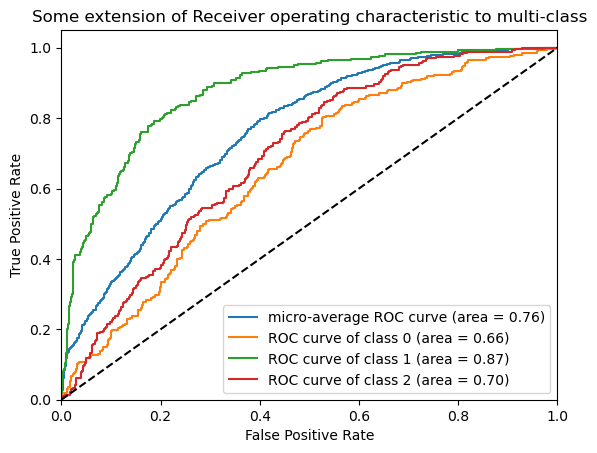

In [9]:
# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()